In [1]:
import hdbscan
import pandas as pd
from plotnine import *
from plotnine.data import *
from sklearn.manifold import TSNE

In [2]:
customers = pd.read_csv(open('kunden.csv'), usecols=[0,2,3,5], names=['mandant', 'anrede','plz','landisocode'])
customers.plz = customers.plz.str.slice(0, 2)

customers = pd.concat([customers,pd.get_dummies(customers['mandant'], prefix='mandant')],axis=1)
customers = pd.concat([customers,pd.get_dummies(customers['anrede'], prefix='anrede')],axis=1)
customers = pd.concat([customers,pd.get_dummies(customers['plz'], prefix='plz')],axis=1)
customers = pd.concat([customers,pd.get_dummies(customers['landisocode'], prefix='landisocode')],axis=1)

customers.drop(['mandant'],axis=1, inplace=True)
customers.drop(['anrede'],axis=1, inplace=True)
customers.drop(['plz'],axis=1, inplace=True)
customers.drop(['landisocode'],axis=1, inplace=True)

customers = customers.sample(75000)

In [3]:
pcaclusterer = hdbscan.HDBSCAN(algorithm='boruvka_kdtree', core_dist_n_jobs=6, alpha=1.0, approx_min_span_tree=True,
                               gen_min_span_tree=False, leaf_size=40,
                               metric='euclidean', min_cluster_size=240, min_samples=1, p=None)
pcaclusterer.fit(customers)


/usr/local/lib64/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


HDBSCAN(algorithm='boruvka_kdtree', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=6, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=240, min_samples=1, p=None,
    prediction_data=False)

In [4]:
print("Anzahl der gefundenen Cluster: {}".format(pcaclusterer.labels_.max()))

Anzahl der gefundenen Cluster: 104


In [5]:
customers['cluster'] = pcaclusterer.labels_.astype(str)
customers.to_csv('kunden_clustrerassignment.csv')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 75000 samples in 6.995s...
[t-SNE] Computed neighbors for 75000 samples in 291.783s...
[t-SNE] Computed conditional probabilities for sample 1000 / 75000
[t-SNE] Computed conditional probabilities for sample 2000 / 75000
[t-SNE] Computed conditional probabilities for sample 3000 / 75000
[t-SNE] Computed conditional probabilities for sample 4000 / 75000
[t-SNE] Computed conditional probabilities for sample 5000 / 75000
[t-SNE] Computed conditional probabilities for sample 6000 / 75000
[t-SNE] Computed conditional probabilities for sample 7000 / 75000
[t-SNE] Computed conditional probabilities for sample 8000 / 75000
[t-SNE] Computed conditional probabilities for sample 9000 / 75000
[t-SNE] Computed conditional probabilities for sample 10000 / 75000
[t-SNE] Computed conditional probabilities for sample 11000 / 75000
[t-SNE] Computed conditional probabilities for sample 12000 / 75000
[t-SNE] Computed conditional probabilities for 

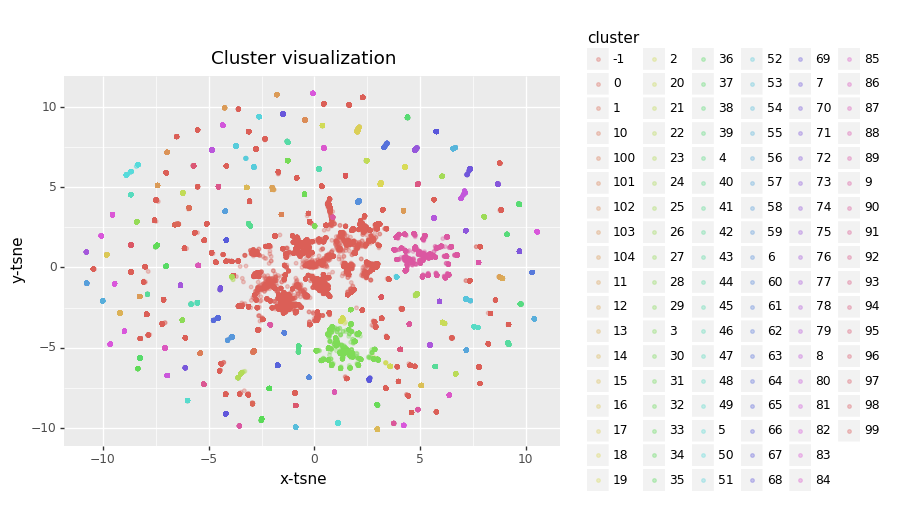

<ggplot: (-9223363283885256125)>


In [6]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(customers)

customers['x-tsne'] = tsne_results[:,0]
customers['y-tsne'] = tsne_results[:,1]

print(ggplot(aes(x='x-tsne', y='y-tsne', color="cluster"), data=customers) + labs(title = 'Cluster visualization') + geom_point(size=1,alpha=0.3))